<a href="https://colab.research.google.com/github/qizhaoaoe/DeepLearningZeroToAll/blob/master/Copy_of_Mandelbrot_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
tf.__version__

'1.14.0'

In [0]:
def DisplayFractal(a, fmt='jpeg'):
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic), 30+50*np.sin(a_cyclic), 155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [0]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display


In [0]:
sess = tf.InteractiveSession()

In [0]:
Y, X = np.mgrid[-1.0:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [0]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [0]:
tf.global_variables_initializer().run()

In [0]:
zs_ = zs*zs + xs

not_diverged = tf.abs(zs_) < 4

step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))

In [0]:
for i in range(200):
  step.run()

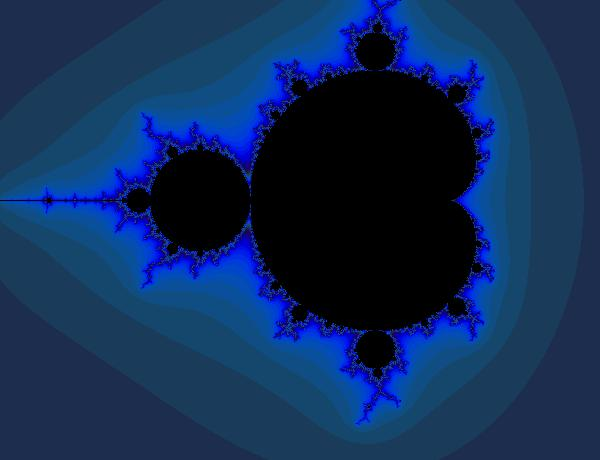

In [0]:
DisplayFractal(ns.eval())